In [1]:
## Figures adapted from: http://sociograph.blogspot.com/2012/11/visualizing-adjacency-matrices-in-python.html

In [23]:
from __future__ import division
import os
import igraph
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats.kde import gaussian_kde
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1 import Grid
import networkx as nx
from matplotlib import pyplot, patches
import numpy as np
from collections import defaultdict

# relevant python libraries
execfile('../functions/python_libraries.py')
execfile('../functions/create_oSBM_class_specific_alternative.py')
execfile('../functions/compute_homophily.py')
execfile('../functions/compute_monophily.py')

In [24]:
def draw_adjacency_matrix_modified(adjacency_matrix, plt_name=None, 
                                   partitions=[], colors=[],
                                  partition_indicator = False):
    plt_name.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    if partition_indicator:
        assert len(partitions) == len(colors)
        for partition, color in zip(partitions, colors):
            current_idx = 0
            for module in partition:
                plt_name.add_patch(patches.Rectangle((current_idx, current_idx),
                                              len(module), # Width
                                              len(module), # Height
                                              facecolor="none",
                                              edgecolor=color,
                                              linewidth="1"))
                current_idx += len(module)

In [25]:
def assignmentArray_to_lists(assignment_array):
    by_attribute_value = defaultdict(list)
    for node_index, attribute_value in enumerate(assignment_array):
        by_attribute_value[attribute_value].append(node_index)
    return by_attribute_value.values()



In [26]:
num_nodes = 220#100 #80 #400
avg_deg = 15#8 #6    #20

In [27]:
disp_val = 0

(adj_ER, y_ER) = create_affiliation_model_temp(avg_deg,#25,
                                  lambda_block_parameter =1,
                                           dispersion_parameter_vect = np.array([np.array([disp_val, disp_val]),
                                            np.array([disp_val, disp_val])]),
                                  class_size_vect = np.array([num_nodes,num_nodes]))






('p_in: ', 0.034090909090909088)
('p_out: ', 0.034090909090909095)

spot-check average degree: 
15.2659090909

spot-check homophily: 
[0.47488584474885842, 0.4973776223776224]

spot-check monophily: 
[0.0, 0.001519853719674945]



In [28]:
disp_val = 0
(adj_homophily, y_homophily) = create_affiliation_model_temp(avg_deg,#25,
                                  lambda_block_parameter =1.6,
                                           dispersion_parameter_vect = np.array([np.array([disp_val, disp_val]),
                                            np.array([disp_val, disp_val])]),
                                  class_size_vect = np.array([num_nodes,num_nodes]))





('p_in: ', 0.05454545454545454)
('p_out: ', 0.013636363636363636)

spot-check average degree: 
15.3

spot-check homophily: 
[0.8049065420560747, 0.79806529625151146]

spot-check monophily: 
[0.0, 0.0002651360374301953]



In [29]:
np.mean(np.sum(adj_homophily,1)==0)

0.0

In [30]:
## khop spot-check
k_hop = np.array([1,2,3,4,5])
class_values = np.unique(y_homophily)

prop_same_array = []
for k in k_hop:  
    print k
    adj_amherst_k= np.matrix(adj_homophily)**k
    adj_amherst_k[range(adj_amherst_k.shape[0]),range(adj_amherst_k.shape[0])]=0 ## remove self-loops
                              
    mv_g1 = (adj_amherst_k[y_homophily==class_values[0],:] * np.matrix((y_homophily==class_values[0])+0).T)/np.sum(adj_amherst_k[y_homophily==class_values[0],:],1)
    mv_g2 = (adj_amherst_k[y_homophily==class_values[1],:] * np.matrix((y_homophily==class_values[1])+0).T)/np.sum(adj_amherst_k[y_homophily==class_values[1],:],1)
    proportion_majority_same = np.mean(np.concatenate((np.array(mv_g1).T[0]>np.mean(y_homophily==class_values[0]),
                                                                       np.array(mv_g2).T[0]>np.mean(y_homophily==class_values[1]))))
    prop_same_array.append( proportion_majority_same)

print prop_same_array

1
2
3
4
5
[0.99318181818181817, 0.98181818181818181, 0.98636363636363633, 0.98181818181818181, 0.97727272727272729]


In [36]:
n = 5
while n > 0:
    disp_val = 0.018
    (adj_monophily, y_monophily) = create_affiliation_model_temp(avg_deg,#45,#25,
                                      lambda_block_parameter =1.0,
                                               dispersion_parameter_vect = np.array([np.array([disp_val, disp_val]),
                                                np.array([disp_val, disp_val])]),
                                      class_size_vect = np.array([num_nodes,num_nodes]))#[550,550]))
    n =np.sum((np.sum(adj_monophily,1)==0)+0)
    print n

('p_in: ', 0.03409090909090909)
('p_out: ', 0.034090909090909095)

spot-check average degree: 
15.5204545455

spot-check homophily: 
[0.47027863777089784, 0.52459016393442626]

spot-check monophily: 
[0.16201300363468688, 0.20289549332971818]

2
('p_in: ', 0.03409090909090909)
('p_out: ', 0.034090909090909095)

spot-check average degree: 
13.7045454545

spot-check homophily: 
[0.51658322903629539, 0.45483415666901911]

spot-check monophily: 
[0.24144712679098818, 0.1852684066130087]

0


In [37]:
## khop spot-check
k_hop = np.array([1,2,3,4,5])
class_values = np.unique(y_monophily)

prop_same_array = []
for k in k_hop:  
    print k
    adj_amherst_k= np.matrix(adj_monophily)**k
    adj_amherst_k[range(adj_amherst_k.shape[0]),range(adj_amherst_k.shape[0])]=0 ## remove self-loops
                              
    mv_g1 = (adj_amherst_k[y_monophily==class_values[0],:] * np.matrix((y_monophily==class_values[0])+0).T)/np.sum(adj_amherst_k[y_monophily==class_values[0],:],1)
    mv_g2 = (adj_amherst_k[y_monophily==class_values[1],:] * np.matrix((y_monophily==class_values[1])+0).T)/np.sum(adj_amherst_k[y_monophily==class_values[1],:],1)
    proportion_majority_same = np.mean(np.concatenate((np.array(mv_g1).T[0]>np.mean(y_monophily==class_values[0]),
                                                                       np.array(mv_g2).T[0]>np.mean(y_monophily==class_values[1]))))
    prop_same_array.append( proportion_majority_same)


print prop_same_array

1
2
3
4
5
[0.48409090909090907, 0.88863636363636367, 0.4681818181818182, 0.6863636363636364, 0.47045454545454546]


In [38]:
adj_ER2 = np.matrix(adj_ER)**2
adj_ER2[range(adj_ER2.shape[0]),range(adj_ER2.shape[0])]=0
adj_ER2 = (adj_ER2 >=1)+0

In [39]:
adj_homophily2 = np.matrix(adj_homophily)**2
adj_homophily2[range(adj_homophily2.shape[0]),range(adj_homophily2.shape[0])]=0
adj_homophily2 = (adj_homophily2 >=1)+0

In [40]:
adj_monophily2 = np.matrix(adj_monophily)**2
adj_monophily2[range(adj_monophily2.shape[0]),range(adj_monophily2.shape[0])]=0
adj_monophily2 = (adj_monophily2 >=1)+0

In [41]:
gender_ER_assignment = y_ER.copy()
gender_ER_lists = assignmentArray_to_lists(gender_ER_assignment)

gender_homophily_assignment = y_homophily.copy()
gender_homophily_lists = assignmentArray_to_lists(gender_homophily_assignment)

gender_monophily_assignment = y_monophily.copy()
gender_monophily_lists = assignmentArray_to_lists(gender_monophily_assignment)

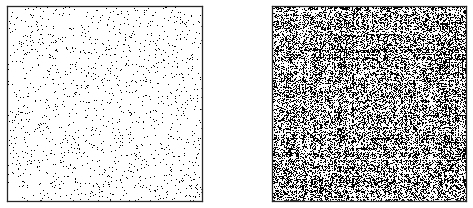

In [42]:
%matplotlib inline
f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=False,
                            figsize=(8, 3))

(V,vect)=np.linalg.eig(adj_ER)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_ER==0)+0)))
idx_c1 = np.array(range(np.sum((y_ER==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_ER)
#draw_adjacency_matrix(G, #np.concatenate([idx1,idx2]), 
#                      partitions=[gender_ER_lists],
#                      colors=["red"],
#                      plt_name=ax1)
draw_adjacency_matrix_modified(adj_ER, #np.concatenate([idx1,idx2]), 
                      partitions=[gender_ER_lists],
                      colors=["red"],
                      plt_name=ax1)

ax1.set_xticklabels([])
ax1.set_yticklabels([])



(V,vect)=np.linalg.eig(adj_ER2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_ER==0)+0)))
idx_c1 = np.array(range(np.sum((y_ER==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_ER2)
#draw_adjacency_matrix(G, #np.concatenate([idx1,idx2]), 
#                      partitions=[gender_ER_lists],colors =["red"], plt_name=ax2)

draw_adjacency_matrix_modified(adj_ER2, #np.concatenate([idx1,idx2]), 
                      partitions=[gender_ER_lists],
                      colors=["red"],
                      plt_name=ax2)



ax2.set_xticklabels([])
ax2.set_yticklabels([])
plt.tight_layout()
plt.show()

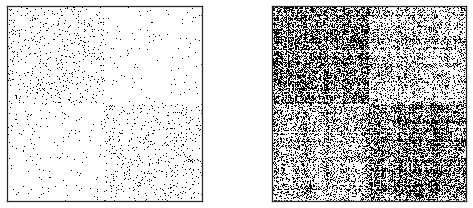

In [43]:
%matplotlib inline
f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=False,
                            figsize=(8, 3))

(V,vect)=np.linalg.eig(adj_homophily)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_homophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_homophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_homophily)
#draw_adjacency_matrix(G, #np.concatenate([idx1,idx2]), 
#                      partitions=[gender_homophily_lists],
#                      colors=["red"],
#                      plt_name=ax1)


draw_adjacency_matrix_modified(adj_homophily, #np.concatenate([idx1,idx2]), 
                      partitions=[gender_homophily_lists],
                      colors=["red"],
                      plt_name=ax1)

ax1.set_xticklabels([])
ax1.set_yticklabels([])



(V,vect)=np.linalg.eig(adj_homophily2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_homophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_homophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_homophily2)
#draw_adjacency_matrix(G, #np.concatenate([idx1,idx2]), 
#                      partitions=[gender_homophily_lists],
#                      colors=["red"], 
#                      plt_name=ax2)

draw_adjacency_matrix_modified(adj_homophily2, #np.concatenate([idx1,idx2]), 
                      partitions=[gender_homophily_lists],
                      colors=["red"], 
                      plt_name=ax2)


ax2.set_xticklabels([])
ax2.set_yticklabels([])
plt.tight_layout()
plt.show()

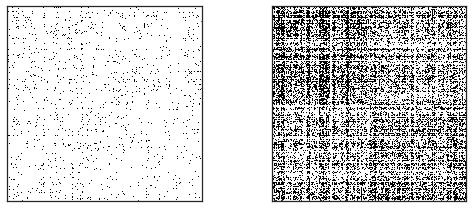

In [44]:
%matplotlib inline
f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=False,
                            figsize=(8, 3))

(V,vect)=np.linalg.eig(adj_monophily)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_monophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_monophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_monophily)
#draw_adjacency_matrix(G, #np.concatenate([idx1,idx2]), 
#                      partitions=[gender_monophily_lists],
#                      colors=["red"],
#                      plt_name=ax1)
draw_adjacency_matrix_modified(adj_monophily, #np.concatenate([idx1,idx2]), 
                      partitions=[gender_monophily_lists],
                      colors=["red"], 
                      plt_name=ax1)


ax1.set_xticklabels([])
ax1.set_yticklabels([])



(V,vect)=np.linalg.eig(adj_monophily2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_monophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_monophily==1)+0))) + len(idx_c0)
np.random.permutation(idx_c0)
#idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
#idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_monophily2)
#draw_adjacency_matrix(G, #np.concatenate([np.random.permutation(idx_c0),np.random.permutation(idx_c1)]), 
#                      partitions=[gender_monophily_lists],
#                      colors=["red"], 
#                      plt_name=ax2)

draw_adjacency_matrix_modified(adj_monophily2, #np.concatenate([idx1,idx2]), 
                      partitions=[gender_monophily_lists],
                      colors=["red"], 
                      plt_name=ax2)


ax2.set_xticklabels([])
ax2.set_yticklabels([])
plt.tight_layout()
plt.show()

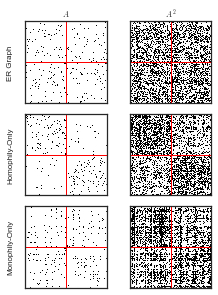

In [45]:
%matplotlib inline
partition_01 = False
f, axarr = plt.subplots(3, 2, 
                    sharey=False, sharex=False,
                    figsize=(3.46457, 4.2),
                    squeeze = True)

## ER graph
draw_adjacency_matrix_modified(adj_ER, plt_name=axarr[0,0],
                              partitions = [gender_ER_lists],
                              colors = ['red'],
                              partition_indicator = partition_01)
                      #partitions=[gender_ER_lists],
                      #colors=["red"],
                      #plt_name=axarr[0,0])
axarr[0,0].set_xticklabels([])
axarr[0,0].set_yticklabels([])



draw_adjacency_matrix_modified(adj_ER2, plt_name=axarr[0,1],
                              partitions = [gender_ER_lists],
                              colors = ['red'],
                              partition_indicator = partition_01)

axarr[0,1].set_xticklabels([])
axarr[0,1].set_yticklabels([])


## Homophily-Only
draw_adjacency_matrix_modified(adj_homophily, plt_name=axarr[1,0],
                              partitions = [gender_homophily_lists],
                              colors = ['red'],
                              partition_indicator = partition_01)

axarr[1,0].set_xticklabels([])
axarr[1,0].set_yticklabels([])


draw_adjacency_matrix_modified(adj_homophily2,plt_name=axarr[1,1],
                              partitions = [gender_homophily_lists],
                              colors = ['red'],
                              partition_indicator = partition_01)
     

axarr[1,1].set_xticklabels([])
axarr[1,1].set_yticklabels([])



## Monophily-Only
draw_adjacency_matrix_modified(adj_monophily,plt_name=axarr[2,0],
                              partitions = [gender_monophily_lists],
                              colors = ['red'],
                              partition_indicator = partition_01)
axarr[2,0].set_xticklabels([])
axarr[2,0].set_yticklabels([])


draw_adjacency_matrix_modified(adj_monophily2,plt_name=axarr[2,1],
                              partitions = [gender_monophily_lists],
                              colors = ['red'],
                              partition_indicator = partition_01)
axarr[2,1].set_xticklabels([])
axarr[2,1].set_yticklabels([])
axarr[0,0].set_title('$A$', size = 8)
axarr[0,1].set_title('$A^2$', size = 8)

axarr[0,0].set_ylabel('ER Graph', size = 8)
axarr[1,0].set_ylabel('Homophily-Only',size = 8)
axarr[2,0].set_ylabel('Monophily-Only',size = 8)
plt.subplots_adjust(wspace=0.02, hspace=0.02)
plt.tight_layout()
pp = PdfPages('../../figures/figure1bNEW.pdf')
pp.savefig(dpi = 300)
pp.close()

# OLD

NameError: name 'draw_adjacency_matrix' is not defined

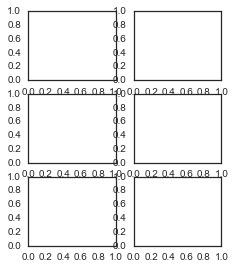

In [46]:
%matplotlib inline
f, axarr = plt.subplots(3, 2, 
                    sharey=False, sharex=False,
                    figsize=(3.46457, 4.2),
                    squeeze = True)

## ER graph
(V,vect)=np.linalg.eig(adj_ER)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_ER==0)+0)))
idx_c1 = np.array(range(np.sum((y_ER==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_ER)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), [gender_ER_lists],["red"],axarr[0,0])
axarr[0,0].set_xticklabels([])
axarr[0,0].set_yticklabels([])



(V,vect)=np.linalg.eig(adj_ER2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_ER==0)+0)))
idx_c1 = np.array(range(np.sum((y_ER==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_ER2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_ER_lists],["red"], axarr[0,1])

axarr[0,1].set_xticklabels([])
axarr[0,1].set_yticklabels([])


## Homophily-Only
(V,vect)=np.linalg.eig(adj_homophily)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_homophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_homophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_homophily)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), [gender_homophily_lists],["red"],axarr[1,0])
axarr[1,0].set_xticklabels([])
axarr[1,0].set_yticklabels([])



(V,vect)=np.linalg.eig(adj_homophily2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_homophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_homophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_homophily2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_homophily_lists],["red"], axarr[1,1])

axarr[1,1].set_xticklabels([])
axarr[1,1].set_yticklabels([])



## Monophily-Only
(V,vect)=np.linalg.eig(adj_monophily)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_monophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_monophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_monophily)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), [gender_monophily_lists],["red"],axarr[2,0])
axarr[2,0].set_xticklabels([])
axarr[2,0].set_yticklabels([])



(V,vect)=np.linalg.eig(adj_monophily2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_monophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_monophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_monophily2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_monophily_lists],["red"], axarr[2,1])
axarr[2,1].set_xticklabels([])
axarr[2,1].set_yticklabels([])
axarr[0,0].set_title('$A$', size = 8)
axarr[0,1].set_title('$A^2$', size = 8)

axarr[0,0].set_ylabel('ER Graph', size = 8)
axarr[1,0].set_ylabel('Homophily-Only',size = 8)
axarr[2,0].set_ylabel('Monophily-Only',size = 8)
plt.subplots_adjust(wspace=0.02, hspace=0.02)
plt.tight_layout()
#plt.show()
pp = PdfPages('../../figures/figure1b.pdf')
pp.savefig(dpi = 300)
pp.close()

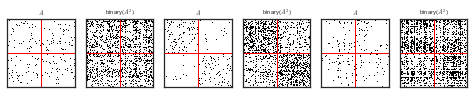

In [66]:
%matplotlib inline
f, axarr = plt.subplots(1, 6, 
                    sharey=False, sharex=False,
                    figsize=(6.69291, 4.6),
                    squeeze = True)

## ER graph
(V,vect)=np.linalg.eig(adj_ER)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_ER==0)+0)))
idx_c1 = np.array(range(np.sum((y_ER==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_ER)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), [gender_ER_lists],["red"],axarr[0])
axarr[0].set_xticklabels([])
axarr[0].set_yticklabels([])



(V,vect)=np.linalg.eig(adj_ER2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_ER==0)+0)))
idx_c1 = np.array(range(np.sum((y_ER==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_ER2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_ER_lists],["red"], axarr[1])

axarr[1].set_xticklabels([])
axarr[1].set_yticklabels([])


## Homophily-Only
(V,vect)=np.linalg.eig(adj_homophily)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_homophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_homophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_homophily)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), [gender_homophily_lists],["red"],axarr[2])
axarr[2].set_xticklabels([])
axarr[2].set_yticklabels([])



(V,vect)=np.linalg.eig(adj_homophily2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_homophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_homophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_homophily2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_homophily_lists],["red"], axarr[3])

axarr[3].set_xticklabels([])
axarr[3].set_yticklabels([])



## Monophily-Only
(V,vect)=np.linalg.eig(adj_monophily)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_monophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_monophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_monophily)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), [gender_monophily_lists],["red"],axarr[4])
axarr[4].set_xticklabels([])
axarr[4].set_yticklabels([])



(V,vect)=np.linalg.eig(adj_monophily2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_monophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_monophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_monophily2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_monophily_lists],["red"], axarr[5])
axarr[5].set_xticklabels([])
axarr[5].set_yticklabels([])
axarr[0].set_title('$A$', size = 6)
axarr[1].set_title('binary($A^2$)', size = 6)
axarr[2].set_title('$A$', size = 6)
axarr[3].set_title('binary($A^2$)', size = 6)
axarr[4].set_title('$A$', size = 6)
axarr[5].set_title('binary($A^2$)', size = 6)

#axarr[0,0].set_ylabel('ER Graph', size = 6)
#axarr[1,0].set_ylabel('Homophily-Only',size = 6)
#axarr[2,0].set_ylabel('Monophily-Only',size = 6)
plt.subplots_adjust(wspace=0.02, hspace=0.02)
plt.tight_layout()
#plt.show()
pp = PdfPages('../../figures/figure1b_row.pdf')
pp.savefig(dpi = 300)
pp.close()

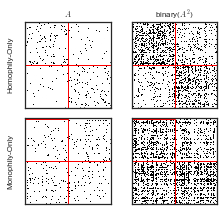

In [50]:
%matplotlib inline
f, axarr = plt.subplots(2, 2, 
                    sharey=False, sharex=False,
                    figsize=(3.46457, 3),
                    squeeze = True,
                       dpi = 300)




## Homophily-Only
(V,vect)=np.linalg.eig(adj_homophily)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_homophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_homophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_homophily)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), [gender_homophily_lists],["red"],axarr[0,0])
axarr[0,0].set_xticklabels([])
axarr[0,0].set_yticklabels([])



(V,vect)=np.linalg.eig(adj_homophily2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_homophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_homophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_homophily2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_homophily_lists],["red"], axarr[0,1])

axarr[0,1].set_xticklabels([])
axarr[0,1].set_yticklabels([])



## Monophily-Only
(V,vect)=np.linalg.eig(adj_monophily)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_monophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_monophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_monophily)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), [gender_monophily_lists],["red"],axarr[1,0])
axarr[1,0].set_xticklabels([])
axarr[1,0].set_yticklabels([])



(V,vect)=np.linalg.eig(adj_monophily2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_monophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_monophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_monophily2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_monophily_lists],["red"], axarr[1,1])
axarr[1,1].set_xticklabels([])
axarr[1,1].set_yticklabels([])
axarr[0,0].set_title('$A$', size = 8)
axarr[0,1].set_title('binary($A^2$)', size = 8)

#axarr[0,0].set_ylabel('ER Graph', size = 8)
axarr[0,0].set_ylabel('Homophily-Only',size = 8)
axarr[1,0].set_ylabel('Monophily-Only',size = 8)
plt.subplots_adjust(wspace=0.02, hspace=0.02)
plt.tight_layout()
#plt.show()
pp = PdfPages('../../figures/figure1bb.pdf')
pp.savefig(dpi = 300)
pp.close()

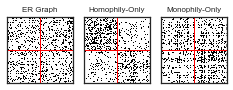

In [51]:
%matplotlib inline
f, axarr = plt.subplots(1, 3, 
                             sharey=False, sharex=False,
                            figsize=(6.69291/2,6.69291/2))

## ER graph
(V,vect)=np.linalg.eig(adj_ER2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_ER==0)+0)))
idx_c1 = np.array(range(np.sum((y_ER==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_ER2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_ER_lists],["red"], axarr[0])

axarr[0].set_xticklabels([])
axarr[0].set_yticklabels([])


## Homophily-Only
(V,vect)=np.linalg.eig(adj_homophily2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_homophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_homophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_homophily2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_homophily_lists],["red"], axarr[1])

axarr[1].set_xticklabels([])
axarr[1].set_yticklabels([])



## Monophily-Only
(V,vect)=np.linalg.eig(adj_monophily2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_monophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_monophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_monophily2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_monophily_lists],["red"], axarr[2])
axarr[2].set_xticklabels([])
axarr[2].set_yticklabels([])
axarr[0].set_title('ER Graph', size = 8)
axarr[1].set_title('Homophily-Only', size = 8)
axarr[2].set_title('Monophily-Only', size = 8)



#axarr[0,1].set_title('binary($A^2$)', size = 8)

#axarr[0,0].set_ylabel('ER Graph', size = 8)
#axarr[1,0].set_ylabel('Homophily-Only',size = 8)
#axarr[2,0].set_ylabel('Monophily-Only',size = 8)
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
#plt.show()
pp = PdfPages('../../figures/figure1b_alternative.pdf')
pp.savefig()
pp.close()